In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.cluster import KMeans
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
# Step 2: Load the Datasets
subscribers_df = pd.read_csv('list_subscribers.csv')
campaign_activity_df = pd.read_csv('campaign_email_activity.csv')
campaign_open_location_df = pd.read_csv('campaign_open_locations.csv')
campaign_opens_df = pd.read_csv('campaign_opens.csv')
campaign_df = pd.read_csv('campaigns.csv')
campaign_clicks_df = pd.read_csv('campaign_clicks.csv')
campaign_sent_to_df = pd.read_csv('campaign_sent_to.csv')
list_growth_history_df = pd.read_csv('list_growth_history.csv')
list_daily_activity_df = pd.read_csv('list_daily_activity.csv')
campaign_bounces_df = pd.read_csv('campaign_bounces.csv')

In [38]:
total_subscribers = subscribers_df.shape[0]
total_subscribers

3688

In [43]:
unsubscribed_reasons = subscribers_df['unsubscribe_reason'].value_counts()
unsubscribed_reasons = pd.DataFrame(unsubscribed_reasons).reset_index()
unsubscribed_reasons.columns = ['unsuscribe reason', 'count']
unsubscribed_reasons

,unsuscribe reason,count
0,No longer interested,118
1,None given,94
2,Did not signup for list,10
3,Spammy content,9
4,Hh,2
5,"Excellent content, but Im moving from ""tired"" ...",1


C:\Users\hp\AppData\Local\Temp\ipykernel_11880\2741051375.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="unsuscribe reason",y="count",data=unsubscribed_reasons,ci=None)


Text(0.5, 1.0, 'Unsubscribed Reasons')

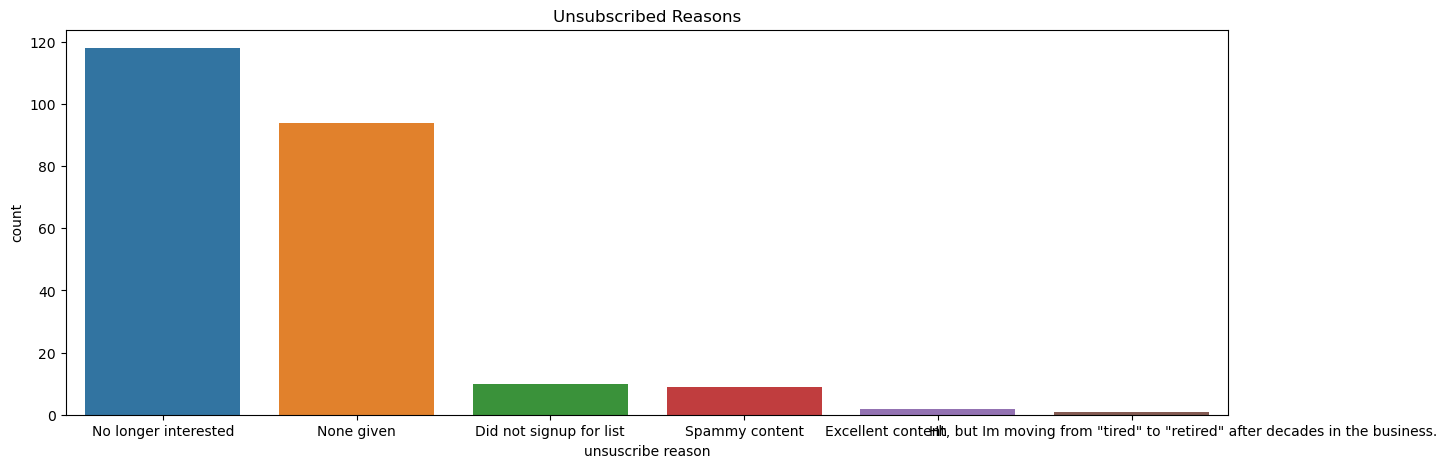

In [46]:
plt.figure(figsize=(15, 5))
sns.barplot(x="unsuscribe reason",y="count",data=unsubscribed_reasons,ci=None)
plt.title("Unsubscribed Reasons")

In [42]:
sign_up_location_distribution = subscribers_df['location'].value_counts()
sign_up_location_distribution = pd.DataFrame(sign_up_location_distribution).reset_index()
sign_up_location_distribution.columns = ['location','Count']
sign_up_location_distribution.head()

,location,Count
0,US,536
1,IN,194
2,GB,183
3,AU,146
4,CA,92


C:\Users\hp\AppData\Local\Temp\ipykernel_11880\804695848.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="location",y="Count",data=sign_up_location_distribution.head(),ci=None)


Text(0.5, 1.0, 'subscribers Location')

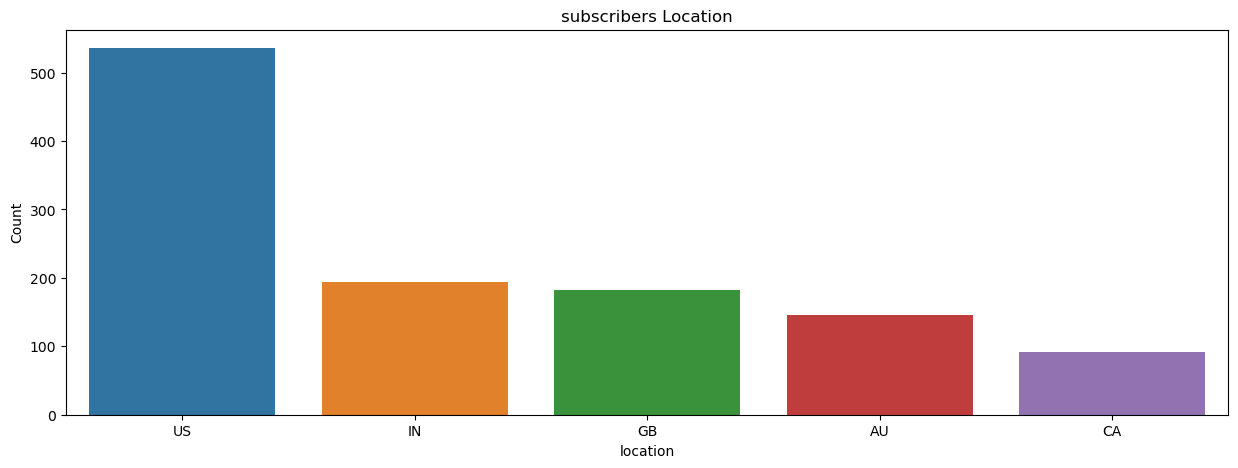

In [47]:
plt.figure(figsize=(15, 5))
sns.barplot(x="location",y="Count",data=sign_up_location_distribution.head(),ci=None)
plt.title("subscribers Location")

In [44]:
member_rating_distribution = subscribers_df['member_rating'].value_counts()
member_rating_distribution = pd.DataFrame(member_rating_distribution).reset_index()
member_rating_distribution.columns =['Members rating','Count']
member_rating_distribution

,Members rating,Count
0,2,1830
1,5,574
2,4,565
3,3,471
4,1,248


C:\Users\hp\AppData\Local\Temp\ipykernel_11880\2173022762.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Members rating",y="Count",data= member_rating_distribution,ci=None)


Text(0.5, 1.0, 'Members rating')

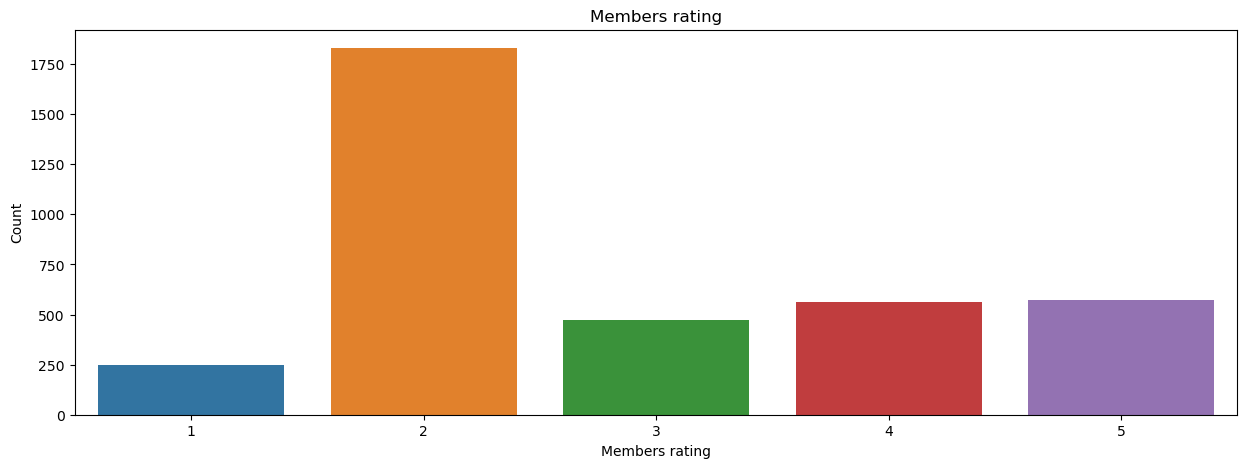

In [48]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Members rating",y="Count",data= member_rating_distribution,ci=None)
plt.title("Members rating")

In [45]:
open_location_counts = campaign_open_location_df.groupby(['country_code', 'region_name'])['opens_count'].sum().reset_index()
open_location_counts

,country_code,region_name,opens_count
0,AE,Abu Dhabi,7
1,AE,Dubai,190
2,AE,Rest of Country,13
3,AE,Sharjah,1
4,AL,Tirane,5
...,...,...,...
290,ZA,Gauteng,329
291,ZA,Kwazulu-natal,2
292,ZA,Western Cape,66
293,ZM,Lusaka,33


In [6]:
stop_words = set(stopwords.words('english'))
punctuation = ['.', ',', '!', '?', ';', ':', '(', ')', '[', ']', '{', '}', "'", '"']

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    return tokens

campaign_df['email_content'] = campaign_df['subject_line'] + ' ' + campaign_df['preview_text']

In [8]:
campaign_df['open_rate'] = campaign_opens_df['unique_opens'] / campaign_df['emails_sent']

campaign_df['click_rate'] = campaign_clicks_df['unique_subscriber_clicks'] / campaign_df['emails_sent']

In [9]:
all_words = []
for content in campaign_df['email_content']:
    all_words.extend(preprocess_text(content))

In [10]:
word_counts = Counter(all_words)
most_common_words = word_counts.most_common()

In [12]:
import re

keyword_engagement = {}
for keyword, count in most_common_words:
    escaped_keyword = re.escape(keyword)
    keyword_engagement[keyword] = {
        'open_rate': campaign_df[campaign_df['email_content'].str.contains(escaped_keyword, case=False)]['open_rate'].mean(),
        'click_rate': campaign_df[campaign_df['email_content'].str.contains(escaped_keyword, case=False)]['click_rate'].mean()
    }


In [13]:
sorted_keywords = sorted(keyword_engagement.items(), key=lambda x: x[1]['open_rate'], reverse=True)

In [22]:
N = 15

In [23]:
top_keywords = [keyword for keyword, _ in sorted_keywords[:N]]
open_rates = [keyword_engagement[keyword]['open_rate'] for keyword in top_keywords]
click_rates = [keyword_engagement[keyword]['click_rate'] for keyword in top_keywords]

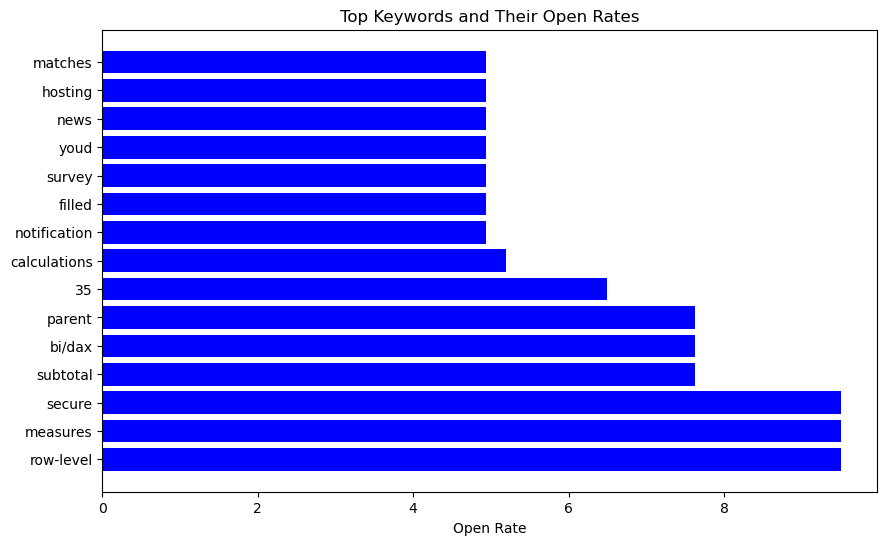

In [24]:
# Bar chart of top N keywords and their open rates
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_keywords)), open_rates, color='blue')
plt.yticks(range(len(top_keywords)), top_keywords)
plt.xlabel('Open Rate')
plt.title('Top Keywords and Their Open Rates')
plt.show()

In [29]:
# df = pd.merge(campaign_df, campaign_opens_df, on='campaign_id')
# df.columns